# Munich Transportation Network
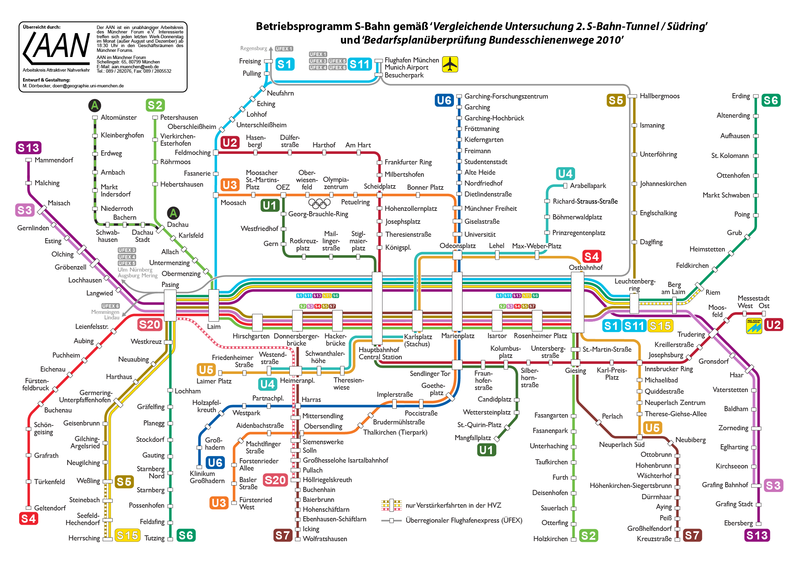

# Data Set
https://en.wikipedia.org/wiki/Trams_in_Munich
https://en.wikipedia.org/wiki/Munich_U-Bahn
https://en.wikipedia.org/wiki/Munich_S-Bahn

# Files
UBahn.csv - SBahn.csv - Trams.csv

In [57]:
################### UTILITY #########################
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def format_name(name, limit):
    name = name.strip()    # remove empty space at start and end if exists
    if len(name) > limit:
        return name[:limit] + '..'
    else:
        return name

def append_csv_to_routes(csv_file, routes,route_names):
    df = pd.read_csv(csv_file)
    new_routes = df.values.tolist()
    
    for i in range(len(new_routes)):
        route_names.append(new_routes[i].pop(0))
        new_routes[i] = new_routes[i][0].split(',')
        new_routes[i] = [format_name(station,10) for station in new_routes[i]]
    
    routes.extend(new_routes)
    return routes, route_names


In [58]:
##################### GRAPH/NETWOK CONSTRUCTION ####################
routes = []
route_names = []
G = nx.Graph()

append_csv_to_routes('UBahn.csv',routes,route_names)
append_csv_to_routes('SBahn.csv',routes,route_names)
append_csv_to_routes('Trams.csv',routes,route_names)

for route in routes:
    ##### Add nodes)

for route in routes:
    for i in range(len(route)-1):
        G.add_edge(route[i],route[i+1])

print('Number of nodes (stations):', len(G.nodes()))
print("Stations: ",G.nodes())
print('Number of edges (Connections): ', len(G.edges))
print('Edges: ', G.edges)

Number of nodes (stations): 216
Stations:  ['Olympia-Ei..', 'Westfriedh..', 'Hauptbahnh..', 'Sendlinger..', 'Kolumbuspl..', 'Mangfallpl..', 'Feldmochin..', 'Harthof', 'Scheidplat..', 'Giesing', 'Innsbrucke..', 'Trudering', 'Messestadt..', 'Moosach', 'Olympiazen..', 'Muenchner ..', 'Odeonsplat..', 'Marienplat..', 'Implerstra..', 'Obersendli..', 'Fuerstenri..', 'Westendstr..', 'Heimeranpl..', 'Karlsplatz', 'Lehel', 'Max-Weber-..', 'Arabellapa..', 'Laimer Pla..', 'Ostbahnhof', 'Neuperlach..', 'Garching-F..', 'Froettmani..', 'Freimann', 'Studentens..', 'Harras', 'Klinikum G..', 'Rotkreuzpl..', 'Freising', 'Pulling', 'Neufahrn', 'Munich Air..', 'Flughafen ..', 'Eching', 'Lohhof', 'Unterschle..', 'Oberschlei..', 'Fasanerie', 'Laim', 'Hirschgart..', 'Donnersber..', 'Hackerbrue..', 'Isartor', 'Rosenheime..', 'Petershaus..', 'Vierkirche..', 'Roehrmoos', 'Hebertshau..', 'Dachau', 'Altomuenst..', 'Kleinbergh..', 'Erdweg', 'Arnbach', 'Markt Inde..', 'Niederroth', 'Schwabhaus..', 'Bachern', 'Dachau

Graph Density:  0.010981912144702842
degree_distribution: [('Hauptbahnh..', 11), ('Max-Weber-..', 10), ('Sendlinger..', 7), ('Scheidplat..', 6), ('Heimeranpl..', 6), ('Ostbahnhof', 6), ('Westfriedh..', 5), ('Giesing', 5), ('Odeonsplat..', 5), ('Westendstr..', 5), ('Pasing', 5), ('Innsbrucke..', 4), ('Trudering', 4), ('Moosach', 4), ('Muenchner ..', 4), ('Marienplat..', 4), ('Karlsplatz', 4), ('Harras', 4), ('Rotkreuzpl..', 4), ('Laim', 4), ('Donnersber..', 4), ('Isartor', 4), ('Rosenheime..', 4), ('Berg am La..', 4), ('Grosshesse..', 4), ('Hohenzolle..', 4), ('Leonrodpla..', 4), ('Ostfriedho..', 4), ('Karlsplatz..', 4), ('Maxmonumen..', 4), ('Olympia-Ei..', 3), ('Kolumbuspl..', 3), ('Feldmochin..', 3), ('Implerstra..', 3), ('Fuerstenri..', 3), ('Arabellapa..', 3), ('Neuperlach..', 3), ('Neufahrn', 3), ('Flughafen ..', 3), ('Dachau', 3), ('Leuchtenbe..', 3), ('Kirchseeon', 3), ('Westkreuz', 3), ('Mittersend..', 3), ('Romanplatz', 3), ('Isartor S', 3), ('Herkomerpl..', 3), ('Lautensack..

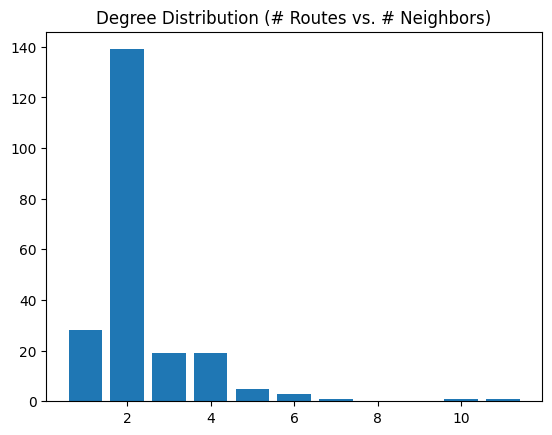

In [59]:
############### DEGREE ANALYSIS ###########################

print('Graph Density: ', nx.density(G))
# # print nodes in G
degrees = sorted(((n,d) for n, d in G.degree()), key=lambda x:x[1], reverse=True)
print("degree_distribution:",degrees)

degree_distribution = {}
for node, degree in degrees:
    if degree not in degree_distribution:
        degree_distribution[degree] = 1
    else:
        degree_distribution[degree] += 1

print(sorted(degree_distribution.items()))

plt.bar(degree_distribution.keys(), degree_distribution.values())
plt.title('Degree Distribution (# Routes vs. # Neighbors)')

clustering = nx.clustering(G)
filtered_clustering = {node: coeff for node, coeff in clustering.items() if coeff > 0}
print("\nClustering:\n", filtered_clustering)



Diameter: 32
Distance_distribution: {0: 216, 1: 510, 2: 942, 3: 1646, 4: 2262, 5: 2628, 6: 2834, 7: 2984, 8: 3008, 9: 3030, 10: 3130, 11: 3184, 12: 3080, 13: 2904, 14: 2648, 15: 2324, 16: 1996, 17: 1660, 18: 1368, 19: 1094, 20: 870, 21: 684, 22: 514, 23: 378, 24: 270, 25: 188, 26: 124, 27: 78, 28: 46, 29: 28, 30: 16, 31: 8, 32: 4}


Text(0.5, 1.0, 'Distance Distribution (number of routes vs. distance)')

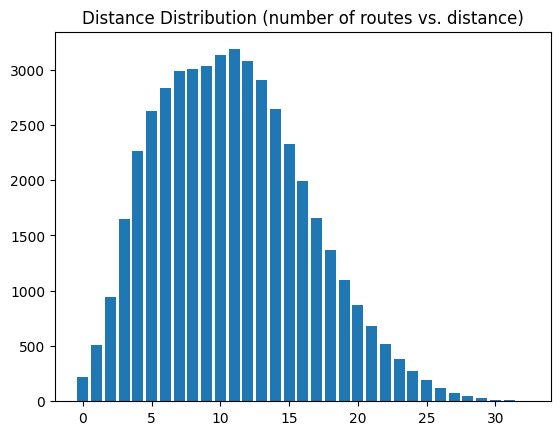

In [60]:
############### DISTANCE ANALYSIS ###########################

diameter = nx.diameter(G)
print("\nDiameter:",diameter)

paths_lengths = dict(nx.all_pairs_shortest_path_length(G))
# make histogram for number of paths of given lengths
lengths_distribution = {}
for origin in paths_lengths:
    for destination in paths_lengths[origin]:
        length = paths_lengths[origin][destination]
        if length not in lengths_distribution:
            lengths_distribution[length] = 1
        else:
            lengths_distribution[length] += 1

print("Distance_distribution:", lengths_distribution)
plt.bar(lengths_distribution.keys(), lengths_distribution.values())
plt.title('Distance Distribution (number of routes vs. distance)')

In [61]:
############### CENTRALITY ANALYSIS ###########################

# Compute degree centrality
closeness_centrality = nx.closeness_centrality(G)
sorted_closeness_centrality = sorted(closeness_centrality.items(), key=lambda x:x[1], reverse=True)
print("\nCloseness Centrality:", sorted_closeness_centrality[0:20])

# Compute betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
sorted_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x:x[1], reverse=True)
print("Betweenness Centrality:", sorted_betweenness_centrality)

# Compute link betweenness centrality
edge_betweenness_centrality = nx.edge_betweenness_centrality(G)
sorted_edge_betweenness_centrality = sorted(edge_betweenness_centrality.items(), key=lambda x:x[1], reverse=True)
print("Edge Betweenness Centrality:", sorted_edge_betweenness_centrality)


Closeness Centrality: [('Hauptbahnh..', 0.15368120085775555), ('Sendlinger..', 0.14909847434119278), ('Heimeranpl..', 0.14909847434119278), ('Karlsplatz', 0.1441985244802146), ('Odeonsplat..', 0.14257294429708223), ('Scheidplat..', 0.14228987425545997), ('Westendstr..', 0.14154048716260698), ('Pasing', 0.14154048716260698), ('Karlsplatz..', 0.14126149802890933), ('Isartor S', 0.14116874589625739), ('Max-Weber-..', 0.14033942558746737), ('Marienplat..', 0.13951979234263465), ('Westfriedh..', 0.13879922530664945), ('Implerstra..', 0.13862024500322373), ('Harras', 0.13835263835263836), ('Muenchner ..', 0.13668150031786394), ('Kolumbuspl..', 0.13642131979695432), ('Rotkreuzpl..', 0.1360759493670886), ('Hackerbrue..', 0.1353904282115869), ('Trappentre..', 0.13403990024937656)]
Betweenness Centrality: [('Hauptbahnh..', 0.41479483352493945), ('Pasing', 0.3948721292472648), ('Heimeranpl..', 0.35610614011070457), ('Sendlinger..', 0.26400590809295965), ('Max-Weber-..', 0.2502709562438922), ('La

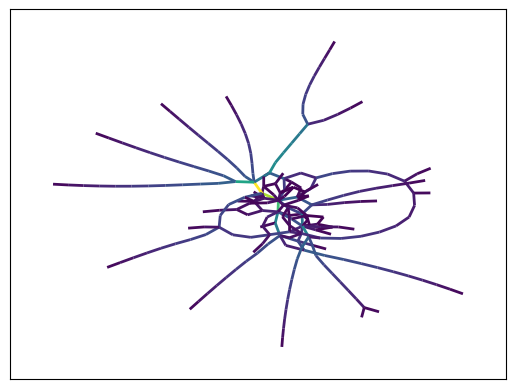

In [62]:
import matplotlib.colors as mcolors
# Normalize edge betweenness values for color mapping
max_centrality = max(edge_betweenness_centrality.values())
min_centrality = min(edge_betweenness_centrality.values())
normalized_centrality = {e: (c - min_centrality) / (max_centrality - min_centrality) for e, c in edge_betweenness_centrality.items()}

# Create a color map
cmap = plt.get_cmap('viridis')

# Draw the network
positions = nx.kamada_kawai_layout(G)

# Draw edges with colors based on edge betweenness centrality
nx.draw_networkx_edges(G, positions, edge_color=[cmap(normalized_centrality[e]) for e in G.edges()], width=2)

# Show plot
plt.show()

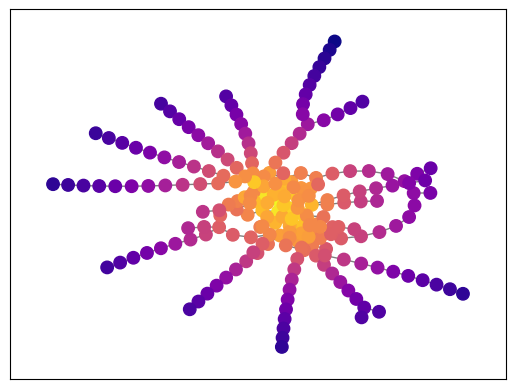

In [63]:
# Normalize closeness centrality values for color mapping
max_closeness = max(closeness_centrality.values())
min_closeness = min(closeness_centrality.values())
normalized_closeness = {node: (centrality - min_closeness) / (max_closeness - min_closeness) for node, centrality in closeness_centrality.items()}

# Create a color map
cmap = plt.get_cmap('plasma')  # Using a different colormap for distinction

# Draw the network
# Draw nodes with colors based on closeness centrality
nx.draw_networkx_nodes(G, positions, node_size=80, cmap=cmap, node_color=[normalized_closeness[node] for node in G.nodes()])
# nx.draw_networkx_labels(G, positions, font_size=6)
nx.draw_networkx_edges(G, positions, edge_color='gray', width=1)  # Drawing edges in gray for better contrast

plt.show()

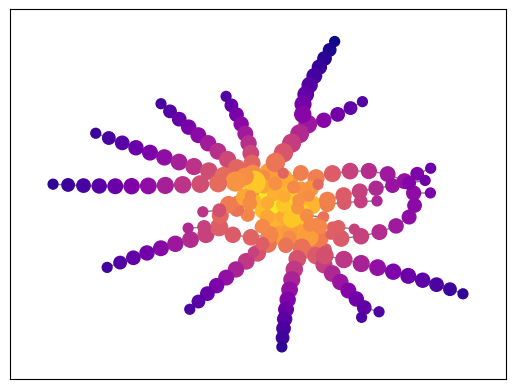

In [68]:
# Normalize betweenness centrality values for node size mapping
max_betweenness = max(betweenness_centrality.values())
min_betweenness = min(betweenness_centrality.values())
normalized_betweenness = {node: 50 + 200 * np.sqrt((centrality - min_betweenness) / (max_betweenness - min_betweenness)) for node, centrality in betweenness_centrality.items()}

# Use normalized betweenness centrality for node sizes
node_sizes = [normalized_betweenness[node] for node in G.nodes()]

# Draw the network with node sizes proportional to betweenness centrality
nx.draw_networkx_nodes(G, positions, node_size=node_sizes, cmap=cmap, node_color=[normalized_closeness[node] for node in G.nodes()])
nx.draw_networkx_edges(G, positions, edge_color='gray', width=1)  # Drawing edges in gray for better contrast

plt.show()